# Обучение ML алгоритмов по информативным фичам из ВЭКГ:

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#from pandas.core.common import SettingWithCopyWarning

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

random.seed(42)

In [42]:
df = pd.read_csv('all_data_for_ml.csv')
df

,Square_QRS_frontal,Square_QRS_sagittal,Square_QRS_axial,Square_ST_frontal,Square_ST_sagittal,Square_ST_axial,Angle_QRST,Frontal_Angle_QRST,FileID,Age,EF,Gender_f,Gender_m,class
0,8.336893e-07,7.278536e-07,2.149840e-06,2.610541e-10,1.051112e-09,9.567503e-11,112.662539,41.334788,1,76,73,1,0,0
1,7.402612e-07,3.468231e-07,6.847881e-07,8.926697e-09,1.980139e-09,6.931836e-08,62.462055,44.982961,2,83,74,0,1,0
2,6.833704e-07,3.611996e-07,8.641801e-07,6.151694e-09,7.288901e-09,5.949312e-10,2.624575,9.793879,3,77,75,0,1,0
3,5.245667e-07,4.037455e-08,1.574025e-07,3.046258e-09,8.787343e-09,1.717640e-08,126.061398,118.078544,4,56,78,0,1,0
4,1.370034e-07,1.116957e-07,1.134765e-06,9.371232e-09,3.066109e-09,2.493297e-08,136.553920,166.829706,5,55,78,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2.882277e-07,6.787564e-07,6.910762e-07,3.220663e-09,9.055682e-09,2.478788e-08,129.570768,51.872633,336,68,29,0,1,1
268,2.769859e-07,1.667682e-07,2.417773e-08,4.595353e-09,2.492971e-10,2.097595e-08,130.471431,136.862002,337,58,29,0,1,1
269,4.595067e-07,3.152899e-07,5.008105e-07,2.863019e-08,1.049836e-08,8.825877e-08,107.037503,51.082878,339,59,39,0,1,1
270,1.530716e-07,3.684035e-07,4.671751e-07,9.574560e-10,3.704179e-09,3.771654e-09,157.240917,137.930779,341,62,33,0,1,1


---

# Классификация (болен/здоров)

### Преподготовка данных:

In [43]:
y = df['class']
X = df.drop(['EF', 'class'], axis=1)

Распределение здоровых и больных: 

0 - здоров 1 - болен

In [44]:
y.value_counts()

class
1    179
0     93
Name: count, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

УБЕРЕМ ПАЦИЕНТОВ КОТОРЫХ ПОПРОСИЛИ:

In [46]:
# Список значений, которые необходимо удалить
values_to_remove = [1, 5, 12, 79, 163, 181, 252, 308, 334, 336]

 
X_train_temp = X_train
X_test_temp = X_test
# Удаление строк с указанными значениями в X_train
X_train = X_train[~X_train_temp['FileID'].isin(values_to_remove)]

 
# Удаление строк с указанными значениями в X_test
X_test = X_test[~X_test_temp['FileID'].isin(values_to_remove)]

y_train_temp = y_train
# Также следует удалить соответствующие значения в y_train и y_test
y_train = y_train[~X_train_temp['FileID'].isin(values_to_remove)]
y_test = y_test[~X_test_temp['FileID'].isin(values_to_remove)]


X_train = X_train.drop(['FileID'], axis=1)
X_test = X_test.drop(['FileID'], axis=1)

Распределение здоровых и больных на тесте:

In [7]:
y_test.value_counts()

class
1    45
0    23
Name: count, dtype: int64

In [8]:
# Выделим признаки для нормализации
features_to_normalize = ['Square_QRS_frontal', 'Square_QRS_sagittal', 'Square_QRS_axial', 
                         'Square_ST_frontal', 'Square_ST_sagittal', 'Square_ST_axial', 
                         'Angle_QRST', 'Frontal_Angle_QRST', 'Age']

# Создадим объект для стандартизации и подгоним его на тренировочных данных
scaler = StandardScaler()
scaler.fit(X_train[features_to_normalize])


with warnings.catch_warnings():
    # Отключаем предупреждения типа SettingWithCopyWarning
    #warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    # Нормализуем признаки на тренировочном и валидационном наборах
    X_train[features_to_normalize] = scaler.transform(X_train[features_to_normalize])
    X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])


In [9]:
X_train

,Square_QRS_frontal,Square_QRS_sagittal,Square_QRS_axial,Square_ST_frontal,Square_ST_sagittal,Square_ST_axial,Angle_QRST,Frontal_Angle_QRST,Age,Gender_f,Gender_m
65,-0.415249,-0.410258,-0.767826,-0.168432,-0.183426,-0.216478,0.101045,-0.989185,1.810405,1,0
235,-0.513682,-0.278298,-0.784530,0.295951,1.450238,-0.003818,-0.754707,-0.980735,0.471384,0,1
136,0.537959,0.075597,0.393612,-0.210027,-0.387831,-0.192483,1.006718,1.100725,0.077554,0,1
263,-0.568109,-0.148594,-0.755512,-0.230781,-0.206144,-0.133637,0.898084,1.545853,0.077554,1,0
222,1.447806,1.957744,4.337031,-0.182289,-0.357103,-0.133394,1.587862,1.609281,-0.473807,0,1
...,...,...,...,...,...,...,...,...,...,...,...
270,-0.499773,-0.188349,-0.528326,-0.227706,-0.333357,-0.210994,1.290176,1.075906,-0.079978,0,1
158,-0.691639,0.379284,1.211703,-0.074985,0.839271,0.223554,-0.465426,-0.971782,1.101512,0,1
261,-0.817283,0.501665,-0.660711,-0.172658,-0.011748,-0.116866,-1.443465,-0.990349,0.471384,1,0
207,-0.729883,-0.458607,-0.345701,0.597003,1.420780,-0.184420,1.240248,1.587395,-1.103935,0,1


## Обучение ML моделей:

__Объективным показателем качества в данном случае будет являться f1-score на класс паталогии и weighted avg f1-score__

## Классификатор Tree

Валидация в данном случае - результат кросс-валидвации cv=5. Все лучшие гиперпараметры для моделей как раз будем искать с помощью кросс-валидации

In [20]:
#Подбор лучших параметров:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
random.seed(42)
par = {'max_depth':range(1, 8), 'min_samples_split':range(2, 7),
     'min_samples_leaf':range(2, 7)}
search = GridSearchCV(clf,par,cv=5)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [21]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица ошибок', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Истинный класс')
    plt.xlabel('Предсказанный класс')

Точность модели на обучающей выборке:  0.78
Точность модели на тестовой выборке:  0.71
F1 score: 0.75
Recall: 0.6666666666666666
Precision: 0.8571428571428571

 clasification report:
               precision    recall  f1-score   support

           0       0.55      0.78      0.64        23
           1       0.86      0.67      0.75        45

    accuracy                           0.71        68
   macro avg       0.70      0.72      0.70        68
weighted avg       0.75      0.71      0.71        68

Матрица несоответствий метода "Дерево решений":



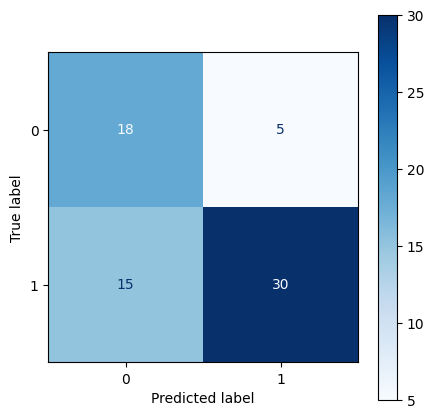

In [22]:
clf_best = search.best_estimator_
train_accuracy = clf_best.score(X_train, y_train)
test_accuracy = clf_best.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (test_accuracy, 2))

print ('F1 score:', f1_score(y_test, clf_best.predict(X_test)))
print ('Recall:', recall_score(y_test, clf_best.predict(X_test)))
print ('Precision:', precision_score(y_test, clf_best.predict(X_test)))
print ('\n clasification report:\n', classification_report(y_test, clf_best.predict(X_test)))

print('Матрица несоответствий метода "Дерево решений":\n')
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, clf_best.predict(X_test)))
disp.plot(cmap = 'Blues', ax=ax); 

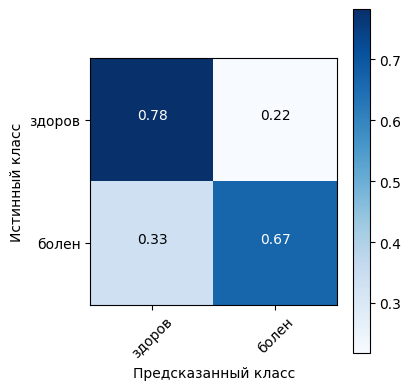

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_test, clf_best.predict(X_test)), ['здоров', 'болен'], normalize=True, title='')


#### Высокий precision в данном случае означает то, что практически все найденные больные реально больные

#### Высокий recall в данном случае означает то, что практически все больные найдены

Определим важность фичей:

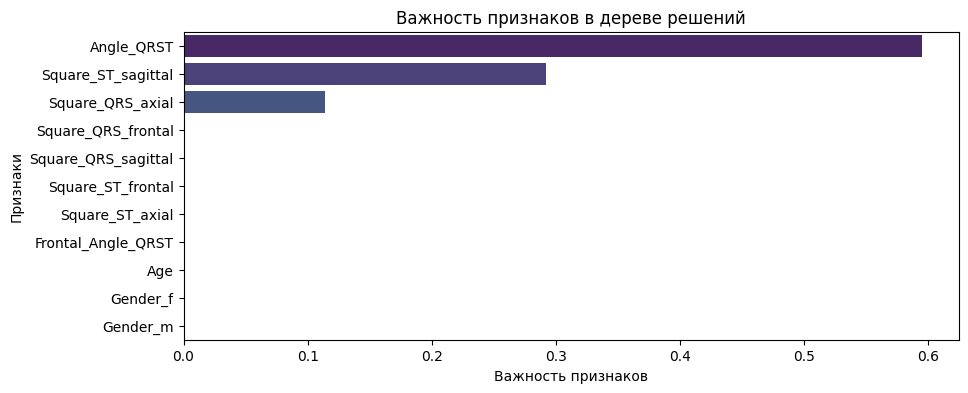

In [24]:
# features - список названий ваших фичей
features = list(X_train.columns)

# importances - список важности для каждой фичи
importances = clf_best.feature_importances_

# Создаем DataFrame для удобства визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Сортируем DataFrame по значению важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Настройки визуализации
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в дереве решений')
plt.show()


__Итог:__  <br/>
accuracy = 71%  <br/>
f1 = 75%  <br/>
weighted avg f1 = 71%

=> падение качества


## Random Forest

Бэггинг позволяет снизить дисперсию (variance) обучаемого классификатора, уменьшая величину, на сколько ошибка будет отличаться, если обучать модель на разных наборах данных, или другими словами, предотвращает переобучение. 

С помощью кросс-валидации я определяю лучшие гиперпараметры а потом согласно ним провожу оценку на тесте

In [27]:
clf = RandomForestClassifier(random_state=42)
random.seed(42)
par = {'n_estimators': range(13, 20), 'max_depth' : range(5, 13), 
     'min_samples_split' : range(2, 5),
     'min_samples_leaf': range(1,5)}
search = GridSearchCV(clf, par, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 13}

Точность модели на обучающей выборке:  0.96
Точность модели на тестовой выборке:  0.87

 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.91      0.89      0.90        45

    accuracy                           0.87        68
   macro avg       0.85      0.86      0.85        68
weighted avg       0.87      0.87      0.87        68

Матрица несоответствий метода "Случайный лес":


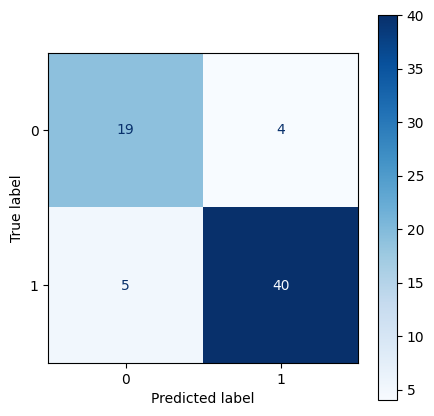

In [28]:
clf_best_rf = search.best_estimator_
clf_best_rf.fit(X_train, y_train)

train_accuracy_rf = clf_best_rf.score(X_train, y_train)
test_accuracy_rf = clf_best_rf.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (train_accuracy_rf, 2))
print ('Точность модели на тестовой выборке: ', round (test_accuracy_rf, 2))

print ('\n clasification report:\n', classification_report(y_test, clf_best_rf.predict(X_test)))

print('Матрица несоответствий метода "Случайный лес":')
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, clf_best_rf.predict(X_test)))
disp.plot(cmap = 'Blues', ax=ax);

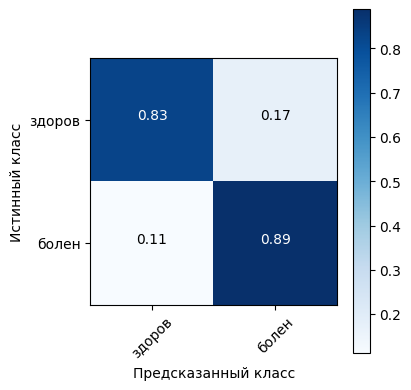

In [29]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_test, clf_best_rf.predict(X_test)), ['здоров', 'болен'], normalize=True, title='')

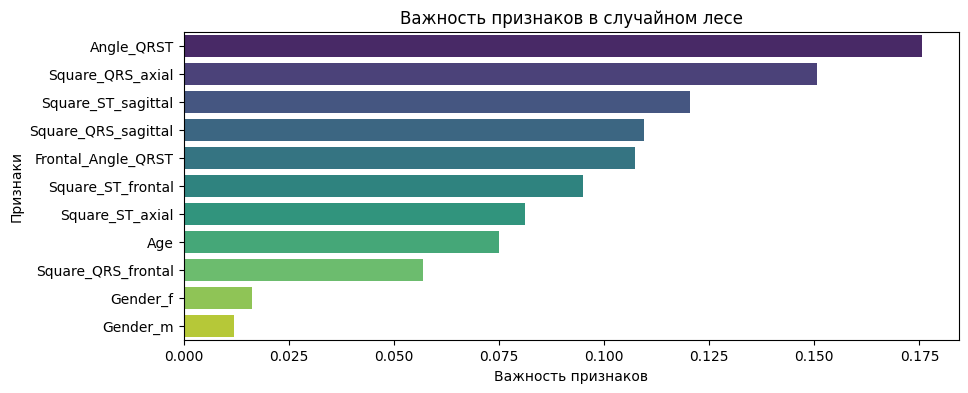

In [30]:
# features - список названий ваших фичей
features = list(X_train.columns)

# importances - список важности для каждой фичи
importances = clf_best_rf.feature_importances_

# Создаем DataFrame для удобства визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Сортируем DataFrame по значению важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Настройки визуализации
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в случайном лесе')
plt.show()

__Итог:__  <br/>
accuracy = 87%  <br/>
f1 = 90%  <br/>
weighted avg f1 = 87%

=> значительное возрастание качества

__Проверим что скажет на этой модели анализ убранных пациентов:__

In [47]:
X_check = X_train_temp[X_train_temp['FileID'].isin(values_to_remove)]
X_check[features_to_normalize] = scaler.transform(X_check[features_to_normalize])
X_check

C:\Users\Дмитрий\AppData\Local\Temp\ipykernel_37552\2476305628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_check[features_to_normalize] = scaler.transform(X_check[features_to_normalize])


,Square_QRS_frontal,Square_QRS_sagittal,Square_QRS_axial,Square_ST_frontal,Square_ST_sagittal,Square_ST_axial,Angle_QRST,Frontal_Angle_QRST,FileID,Age,Gender_f,Gender_m
244,-0.663645,-0.256259,-0.740263,-0.096117,-0.015971,-0.002489,1.547733,1.368189,308,1.574107,0,1
267,-0.193367,0.223367,-0.298934,-0.196914,-0.240921,-0.117332,0.796390,-0.292039,336,0.392618,0,1
200,-0.262321,-0.672995,-0.742708,-0.048983,2.011323,0.269426,1.146653,1.278878,252,1.180277,0,1
266,-0.711423,-0.298017,-0.814669,-0.232203,-0.338323,-0.171195,1.064861,0.322490,334,0.707682,0,1
0,1.043225,0.288500,1.195603,-0.237180,-0.379183,-0.227377,0.494656,-0.459545,1,1.022746,1,0
4,-0.536201,-0.528900,0.155635,-0.113234,-0.344379,-0.116685,0.921007,1.535272,5,-0.631339,0,1
10,-0.827897,-0.621513,-0.898844,-0.232083,-0.383632,-0.225574,-0.563688,-0.891406,12,0.943980,1,0
132,-0.528343,-0.513309,-0.977645,-0.235822,-0.350845,-0.222835,1.048052,0.006070,163,-0.237510,0,1
67,-0.350641,-0.139588,-0.989323,-0.186958,-0.374255,-0.182753,1.384282,1.363189,79,0.156320,1,0


In [48]:
X_check = X_check.drop(['FileID'], axis=1)
y_check = y_train_temp[X_train_temp['FileID'].isin(values_to_remove)]
y_check

244    1
267    1
200    1
266    1
0      0
4      0
10     0
132    1
67     1
Name: class, dtype: int64

Результаты ошибок для этих убранных пациентах:

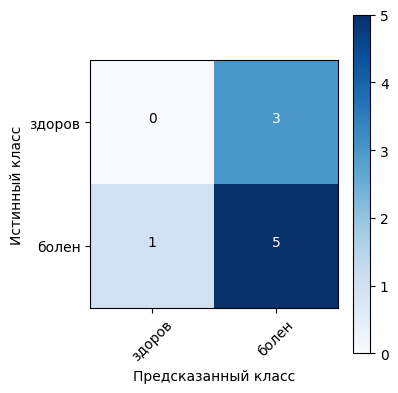

In [50]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_check, clf_best_rf.predict(X_check)), ['здоров', 'болен'], normalize=False, title='')

## Логистическая регрессия

Точность модели на обучающей выборке:  0.65
Точность модели на тестовой выборке:  0.74
F1 score: 0.8163265306122449
Recall: 0.8888888888888888
Precision: 0.7547169811320755

 clasification report:
               precision    recall  f1-score   support

           0       0.67      0.43      0.53        23
           1       0.75      0.89      0.82        45

    accuracy                           0.74        68
   macro avg       0.71      0.66      0.67        68
weighted avg       0.72      0.74      0.72        68

Матрица несоответствий метода "Логистическая регрессия":


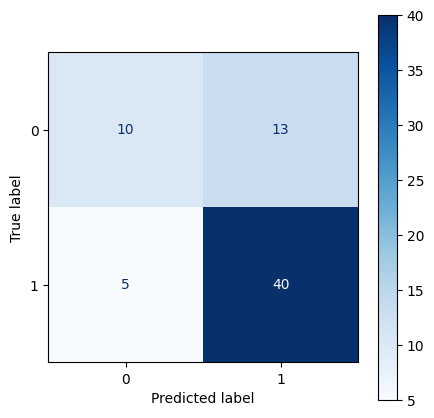

In [51]:
LR_model = LogisticRegression(solver='liblinear')
# Обучим модель на обучающей выборке
LR_model.fit(X_train, y_train) 
# Предскажем класс тестовой выборки
LR_prediction = LR_model.predict(X_test) 

LR_train_accuracy = LR_model.score(X_train, y_train)
LR_test_accuracy = LR_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (LR_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (LR_test_accuracy, 2))

print ('F1 score:', f1_score(y_test, LR_model.predict(X_test)))
print ('Recall:', recall_score(y_test, LR_model.predict(X_test)))
print ('Precision:', precision_score(y_test, LR_model.predict(X_test)))
print ('\n clasification report:\n', classification_report(y_test, LR_model.predict(X_test)))

print('Матрица несоответствий метода "Логистическая регрессия":')
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, LR_model.predict(X_test)))
disp.plot(cmap = 'Blues', ax=ax);

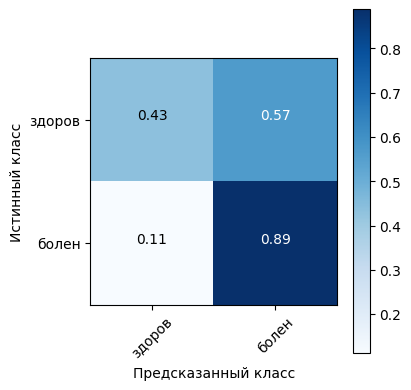

In [54]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_test, LR_model.predict(X_test)), ['здоров', 'болен'], normalize=True, title='')

Для модели логистической регрессии важность фичей можно оценить на основе абсолютных значений коэффициентов, которые модель присваивает каждому признаку. Большие абсолютные значения коэффициентов обычно указывают на более важные признаки.

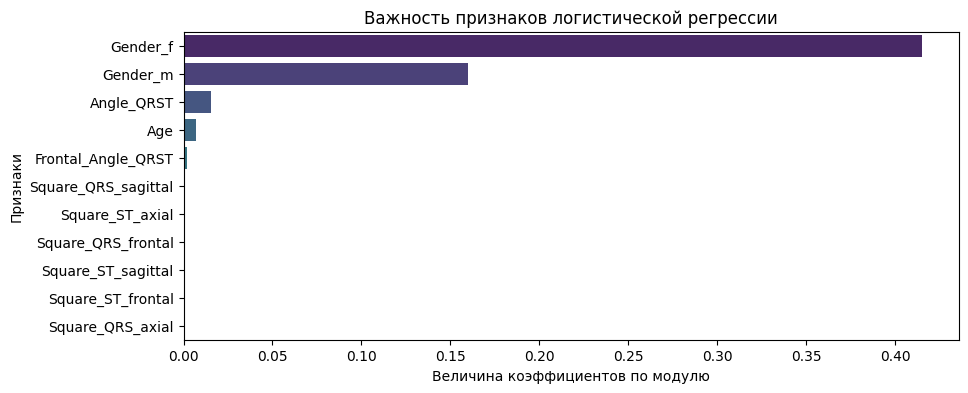

In [53]:
# Получаем коэффициенты модели
coefficients = LR_model.coef_[0]

# Список названий фичей
feature_names = X_train.columns.tolist()

# Создаем DataFrame для удобства визуализации
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортируем DataFrame по абсолютному значению коэффициентов
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Визуализация
plt.figure(figsize=(10, 4))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Величина коэффициентов по модулю')
plt.ylabel('Признаки')
plt.title('Важность признаков логистической регрессии')
plt.show()

__Итог:__  <br/>
accuracy = 74%  <br/>
f1 = 82%  <br/>
weighted avg f1 = 72%

=> значительное падение и признак изменился опорный (мб из-за ненормирования)

## KNN

In [55]:
clf = KNeighborsClassifier()
random.seed(42)
par = {'n_neighbors': range(1, 15)}
search = GridSearchCV(clf, par, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'n_neighbors': 9}

Точность модели на обучающей выборке:  0.7
Точность модели на тестовой выборке:  0.72

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.65      0.61        23
           1       0.81      0.76      0.78        45

    accuracy                           0.72        68
   macro avg       0.69      0.70      0.70        68
weighted avg       0.73      0.72      0.72        68

Матрица несоответствий метода "KNN":


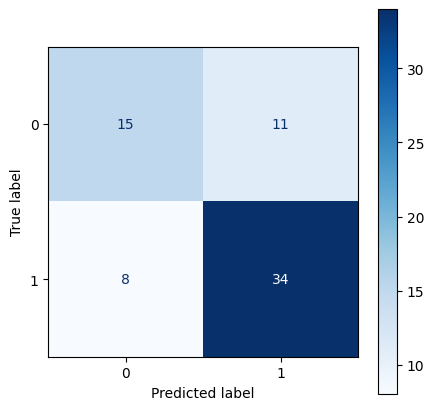

In [56]:
KNN_model = KNeighborsClassifier(n_neighbors = 9)
KNN_model.fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)

KNN_train_accuracy = KNN_model.score(X_train, y_train)
KNN_test_accuracy = KNN_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (KNN_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (KNN_test_accuracy, 2))

print ('\n clasification report:\n', classification_report(y_test, KNN_model.predict(X_test)))

fig, ax = plt.subplots(figsize=(5, 5))
print('Матрица несоответствий метода "KNN":')
disp = ConfusionMatrixDisplay(confusion_matrix(KNN_prediction, y_test))
disp.plot(cmap = 'Blues', ax=ax);

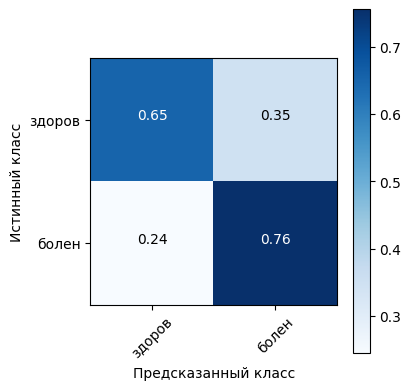

In [57]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_test, KNN_model.predict(X_test)), ['здоров', 'болен'], normalize=True, title='')

Дополнительно оценим важность фичей для KNN-модели с помощью метода Permutation Importance, который перетасовывает значения одного признака в тестовой выборке и измеряет, как это влияет на точность модели

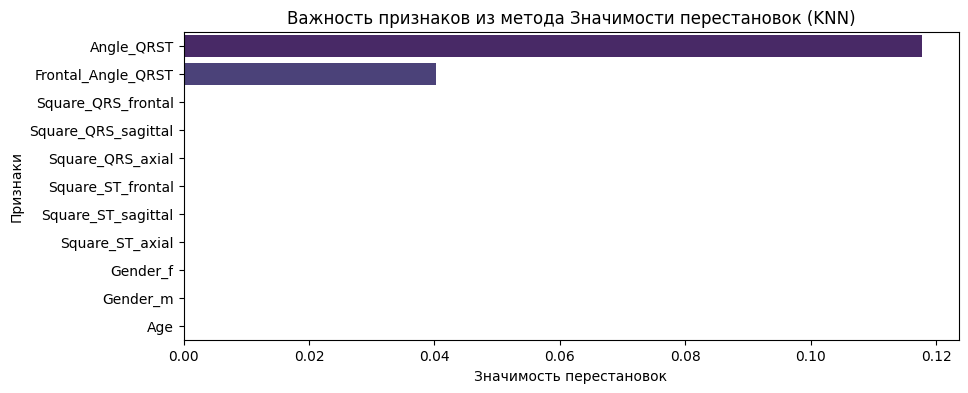

In [58]:
from sklearn.inspection import permutation_importance

# Вычисление перестановочной важности
perm_importance = permutation_importance(KNN_model, X_test, y_test, n_repeats=30, random_state=0)

# Список названий фичей
feature_names = X_train.columns.tolist()

# Создаем DataFrame для удобства визуализации
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})

# Сортируем DataFrame по важности
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='viridis')
plt.xlabel('Значимость перестановок')
plt.ylabel('Признаки')
plt.title('Важность признаков из метода Значимости перестановок (KNN)')
plt.show()


__Итог:__  <br/>
accuracy = 72%  <br/>
f1 = 78%  <br/>
weighted avg f1 = 72%

=> Небольшое падение метрик

## SVM - Метод опорных векторов

In [59]:
clf = SVC()
random.seed(42)
par={'degree': range(1,15)}
search=GridSearchCV(clf, par, cv=5, n_jobs=-1)
search.fit(X_train, y_train)
search.best_params_

{'degree': 1}

Точность модели на обучающей выборке:  0.66
Точность модели на тестовой выборке:  0.66

 clasification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.66      1.00      0.80        45

    accuracy                           0.66        68
   macro avg       0.33      0.50      0.40        68
weighted avg       0.44      0.66      0.53        68

Матрица несоответствий метода опорных векторов:


C:\Users\Дмитрий\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Дмитрий\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Дмитрий\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

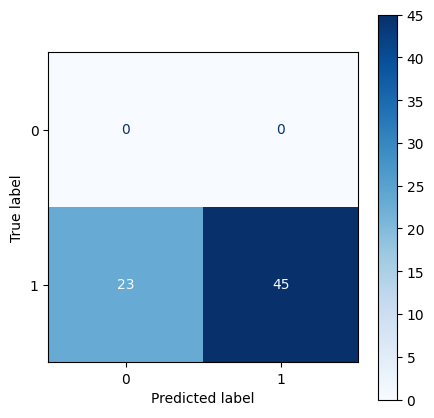

In [65]:
SVC_model = SVC(gamma='scale', kernel='poly', degree=1) 
SVC_model.fit(X_train, y_train)
SVC_prediction = SVC_model.predict(X_test) 

SVC_train_accuracy = SVC_model.score(X_train, y_train)
SVC_test_accuracy = SVC_model.score(X_test, y_test)
print ('Точность модели на обучающей выборке: ', round (SVC_train_accuracy, 2))
print ('Точность модели на тестовой выборке: ', round (SVC_test_accuracy, 2))

print ('\n clasification report:\n', classification_report(y_test, SVC_model.predict(X_test)))

fig, ax = plt.subplots(figsize=(5, 5))
print('Матрица несоответствий метода опорных векторов:')
disp = ConfusionMatrixDisplay(confusion_matrix(SVC_prediction, y_test))
disp.plot(cmap = 'Blues', ax=ax);

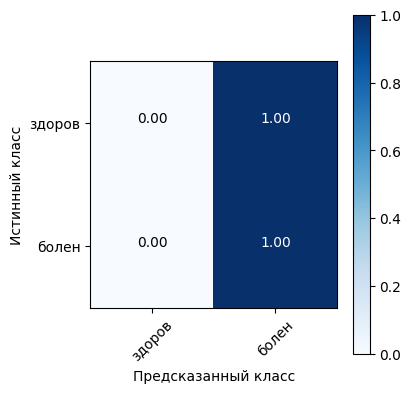

In [62]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_test, SVC_model.predict(X_test)), ['здоров', 'болен'], normalize=True, title='')

__Итог:__  <br/>
accuracy = 66%  <br/>
f1 = 80%  <br/>
weighted avg f1 = 53%

=> полный ужас - теперь все есть больные

## Градиентный бустинг - CatBoostClassifier

In [63]:
# Создаем модель CatBoost
catboost_model = CatBoostClassifier()
random.seed(42)
# Определяем сетку параметров для поиска
param_grid = {
    'depth': [3, 5, 7],             # пример значений глубины деревьев
    'learning_rate': [0.01, 0.1],  # пример значений скорости обучения
    'iterations': [100, 200, 300]       # пример значений числа деревьев
}

# Инициализируем GridSearchCV
search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Производим поиск наилучших параметров
search.fit(X_train, y_train, verbose_eval=False)

# Выводим наилучшие параметры
print("Наилучшие параметры:", search.best_params_)

Наилучшие параметры: {'depth': 5, 'iterations': 300, 'learning_rate': 0.1}


Точность модели на обучающей выборке: 1.0
Точность модели на тестовой выборке: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.67        23
           1       0.83      0.84      0.84        45

    accuracy                           0.78        68
   macro avg       0.75      0.75      0.75        68
weighted avg       0.78      0.78      0.78        68

Матрица несоответствий метода градиентного бустинга:


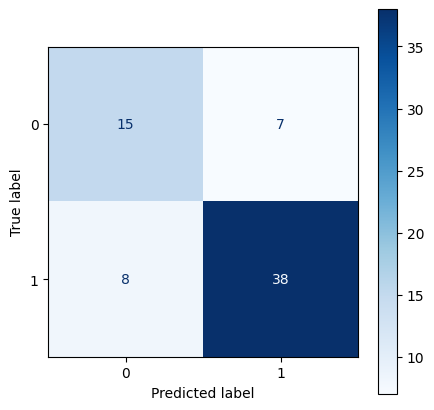

In [66]:
# Создаем модель CatBoost
catboost_model = CatBoostClassifier(iterations=300,  # Например, начнем с 100 деревьев
                                    depth=5,
                                    learning_rate=0.1,
                                    loss_function='Logloss',
                                    random_seed=42,
                                    verbose=200)

# Обучаем модель на обучающей выборке
catboost_model.fit(X_train, y_train, verbose_eval=False)

# Предсказываем классы на тестовой выборке
catboost_predictions = catboost_model.predict(X_test)

# Вычисляем точность модели на обучающей выборке
catboost_train_accuracy = catboost_model.score(X_train, y_train)

# Вычисляем точность модели на тестовой выборке
catboost_test_accuracy = catboost_model.score(X_test, y_test)

# Выводим точность на обучающей и тестовой выборках
print('Точность модели на обучающей выборке:', round(catboost_train_accuracy, 2))
print('Точность модели на тестовой выборке:', round(catboost_test_accuracy, 2))

# Выводим отчет о классификации
print('\nClassification Report:\n', classification_report(y_test, catboost_predictions))

fig, ax = plt.subplots(figsize=(5, 5))
print('Матрица несоответствий метода градиентного бустинга:')
disp = ConfusionMatrixDisplay(confusion_matrix(catboost_predictions, y_test))
disp.plot(cmap = 'Blues', ax=ax);

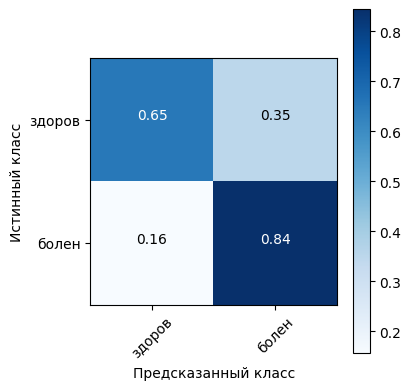

In [67]:
fig, ax = plt.subplots(figsize=(4, 4))
plot_confusion_matrix(confusion_matrix(y_test, catboost_model.predict(X_test)), ['здоров', 'болен'], normalize=True, title='')

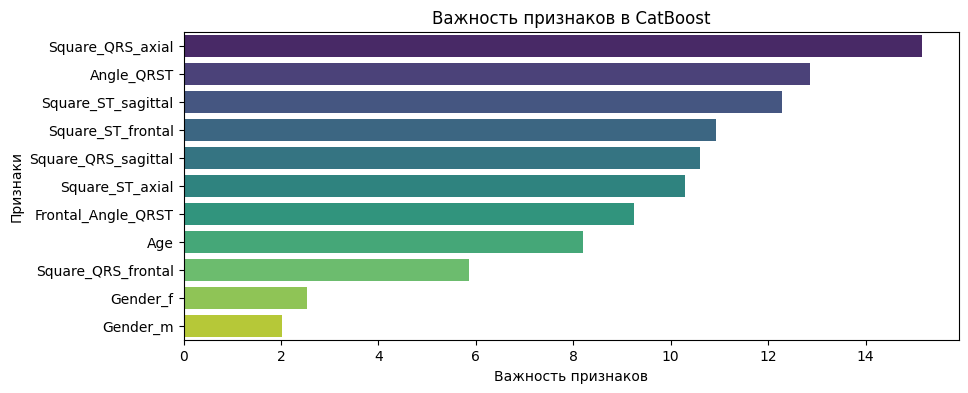

In [68]:
# Получение оценок важности признаков
feature_importances = catboost_model.get_feature_importance()

# Список названий признаков
features = list(X_train.columns)

# Создание DataFrame для визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Сортировка DataFrame по значению важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Настройка визуализации
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в CatBoost')
plt.show()

__Итог:__  <br/>
accuracy = 78%  <br/>
f1 = 84%  <br/>
weighted avg f1 = 78%

=> нет изменений

## ВЫВОД:
__Лучшие результаты показали модель random forrest, достигнув результатов accuracy = 87%, f1 = 90%, weighted avg f1 = 87% и модель катбуст, которая достигла на тесте accuracy = 78%, f1 = 84% и weighted avg f1 = 78%.__

---

# Вычислению значения фракции левого желудочка (задача регресии)

In [69]:
y = df['EF']
X = df.drop(['class', 'EF'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Список значений, которые необходимо удалить
values_to_remove = [1, 5, 12, 79, 163, 181, 252, 308, 334, 336]

X_train_temp = X_train
X_test_temp = X_test
# Удаление строк с указанными значениями в X_train
X_train = X_train[~X_train_temp['FileID'].isin(values_to_remove)]

# Удаление строк с указанными значениями в X_test
X_test = X_test[~X_test_temp['FileID'].isin(values_to_remove)]

# Также следует удалить соответствующие значения в y_train и y_test
y_train = y_train[~X_train_temp['FileID'].isin(values_to_remove)]
y_test = y_test[~X_test_temp['FileID'].isin(values_to_remove)]

X_train = X_train.drop(['FileID'], axis=1)
X_test = X_test.drop(['FileID'], axis=1)

In [70]:
# Выделим признаки для нормализации
features_to_normalize = ['Square_QRS_frontal', 'Square_QRS_sagittal', 'Square_QRS_axial', 
                         'Square_ST_frontal', 'Square_ST_sagittal', 'Square_ST_axial', 
                         'Angle_QRST', 'Frontal_Angle_QRST', 'Age']

# Создадим объект для стандартизации и подгоним его на тренировочных данных
scaler = StandardScaler()
scaler.fit(X_train[features_to_normalize])


with warnings.catch_warnings():
    # Отключаем предупреждения типа SettingWithCopyWarning
    #warnings.simplefilter("ignore", category=SettingWithCopyWarning)

    # Нормализуем признаки на тренировочном и валидационном наборах
    X_train[features_to_normalize] = scaler.transform(X_train[features_to_normalize])
    X_test[features_to_normalize] = scaler.transform(X_test[features_to_normalize])

## Градиентный бустинг - CatBoostRegressor

Наилучшие параметры: {'depth': 6, 'iterations': 150, 'learning_rate': 0.05}
Среднеквадратичная ошибка (MSE): 136.87721831825849
Средняя абсолютная ошибка (MAE): 10.290216671956756


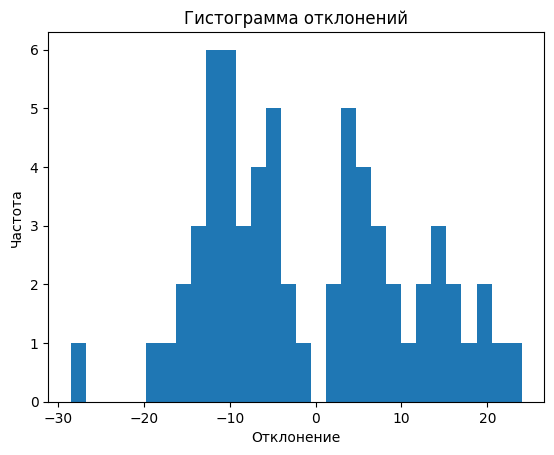

In [71]:
# Создаем модель CatBoostRegressor
catboost_regressor = CatBoostRegressor()
random.seed(42)
# Определяем сетку параметров для поиска
param_grid = {
    'depth': [3, 4, 5, 6],             # пример значений глубины деревьев
    'learning_rate': [0.05, 0.1],  # пример значений скорости обучения
    'iterations': [150, 200, 250]       # пример значений числа деревьев
}

# Инициализируем GridSearchCV
search = GridSearchCV(estimator=catboost_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)

# Производим поиск наилучших параметров
search.fit(X_train, y_train, verbose_eval=False)

# Выводим наилучшие параметры
print("Наилучшие параметры:", search.best_params_)

# Создаем модель CatBoostRegressor с наилучшими параметрами
best_catboost_regressor = CatBoostRegressor(**search.best_params_)

# Обучаем модель на обучающей выборке
best_catboost_regressor.fit(X_train, y_train, verbose_eval=False)

# Предсказываем значения на тестовой выборке
catboost_predictions = best_catboost_regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку на тестовой выборке
mse = mean_squared_error(y_test, catboost_predictions)

# Выводим среднеквадратичную ошибку
print('Среднеквадратичная ошибка (MSE):', mse)

# Вычисляем среднюю абсолютную ошибку (MAE)
mae = mean_absolute_error(y_test, catboost_predictions)
print('Средняя абсолютная ошибка (MAE):', mae)

# Строим гистограмму отклонений
errors = y_test - catboost_predictions
plt.hist(errors, bins=30)
plt.xlabel('Отклонение')
plt.ylabel('Частота')
plt.title('Гистограмма отклонений')
plt.show()

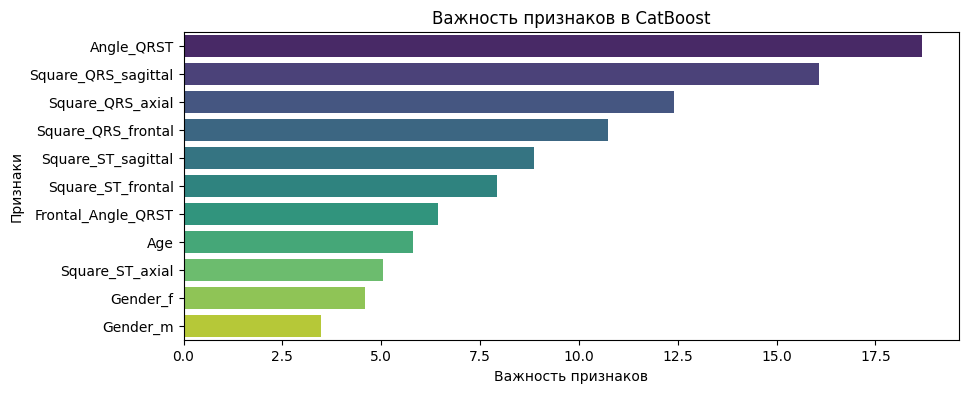

In [73]:
# Получение оценок важности признаков
feature_importances = best_catboost_regressor.get_feature_importance()

# Список названий признаков
features = list(X_train.columns)

# Создание DataFrame для визуализации
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Сортировка DataFrame по значению важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Настройка визуализации
plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Важность признаков в CatBoost')
plt.show()

## Линейная регрессия:

Среднеквадратичная ошибка линейной регрессии (MSE): 199.81568544434538
Средняя абсолютная ошибка линейной регрессии (MAE): 12.083906439959637


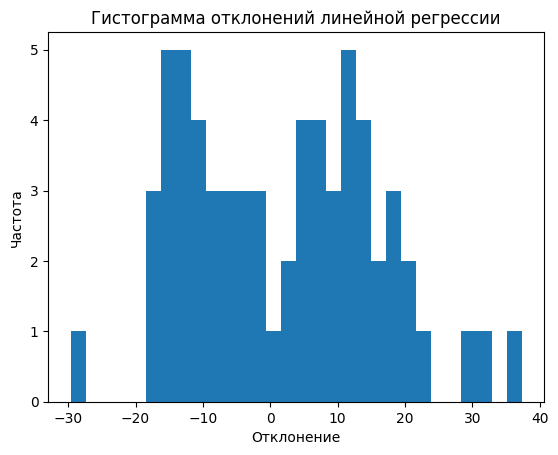

In [74]:
# Обучаем линейную регрессию
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Предсказываем значения на тестовой выборке с помощью линейной регрессии
linear_predictions = linear_regressor.predict(X_test)

# Вычисляем среднеквадратичную ошибку на тестовой выборке для линейной регрессии
mse_linear = mean_squared_error(y_test, linear_predictions)
print('Среднеквадратичная ошибка линейной регрессии (MSE):', mse_linear)

# Вычисляем среднюю абсолютную ошибку (MAE) для линейной регрессии
mae_linear = mean_absolute_error(y_test, linear_predictions)
print('Средняя абсолютная ошибка линейной регрессии (MAE):', mae_linear)

# Строим гистограмму отклонений для линейной регрессии
errors_linear = y_test - linear_predictions
plt.hist(errors_linear, bins=30)
plt.xlabel('Отклонение')
plt.ylabel('Частота')
plt.title('Гистограмма отклонений линейной регрессии')
plt.show()

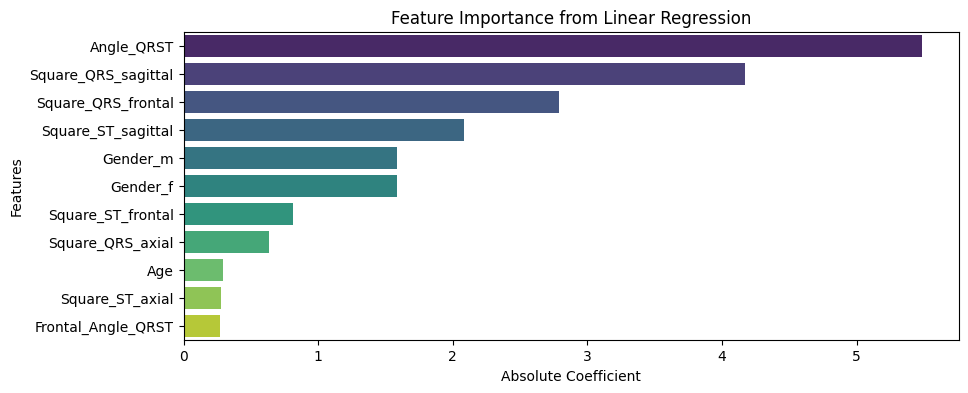

In [75]:
# Получаем коэффициенты модели
coefficients = linear_regressor.coef_

# Список названий фичей
feature_names = X_train.columns.tolist()

# Создаем DataFrame для удобства визуализации
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Сортируем DataFrame по абсолютному значению коэффициентов
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Визуализация
plt.figure(figsize=(10, 4))
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Features')
plt.title('Feature Importance from Linear Regression')
plt.show()


## ВЫВОД:
__Лучшие результаты показала модель градиентного бустинга, достигнув результатов MAE=10.2. Было определено, что пространсвенный угол QRST во всех исследованных методах регрессии и классификации имеет самую высокую значимость в финальной оценке__